# <center>7.3.1 实战: CIFAR数据集分类和猫狗分类</center>

实验说明：本实验代码利用Tensorflow2.x框架搭建VGG-16模型，并使用CIFAR数据集对模型进行训练，最终能进行猫狗分类。运行该代码需要的环境如下：
Python3.5+
Tensorflow2.1.0


## 1.导入需要的python库

首先导入需要的python库，基于TensorFlow的Keras模块用于构建和训练模型。在导入Tensorflow之后，打印了其版本。以下代码均为TensorFlow2.x版本代码，若运行的版本小于2.0，则代码可能无法正常运行。

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


os.environ["CUDA_VISIBLE_DEVICES"] = "1"

## 2.定义图片读取函数

规定从文件夹中读取图片的规范，划分训练与测试用图片并分配标签。

In [3]:
resize = 224
path ="train/"

def load_data():
    imgs = os.listdir(path)
    num = len(imgs)
    train_data = np.empty((5000, resize, resize, 3), dtype="int32")
    train_label = np.empty((5000, ), dtype="int32")
    test_data = np.empty((5000, resize, resize, 3), dtype="int32")
    test_label = np.empty((5000, ), dtype="int32")
    for i in range(5000):
        if i % 2:
            train_data[i] = cv2.resize(cv2.imread(path+'/'+ 'dog.' + str(i) + '.jpg'), (resize, resize))
            train_label[i] = 1
        else:
            train_data[i] = cv2.resize(cv2.imread(path+'/' + 'cat.' + str(i) + '.jpg'), (resize, resize))
            train_label[i] = 0
    for i in range(5000, 10000):
        if i % 2:
            test_data[i-5000] = cv2.resize(cv2.imread(path+'/' + 'dog.' + str(i) + '.jpg'), (resize, resize))
            test_label[i-5000] = 1
        else:
            test_data[i-5000] = cv2.resize(cv2.imread(path+'/' + 'cat.' + str(i) + '.jpg'), (resize, resize))
            test_label[i-5000] = 0
    return train_data, train_label, test_data, test_label

## 3.构建网络结构

根据VGG-16的结构定义逐层搭建，总计13个卷积层，3个全连接层。输出两个类别的概率值。

In [4]:
def vgg16():
    weight_decay = 0.0005
    nb_epoch = 100
    batch_size = 32
    
    # layer1
    model = keras.Sequential()
    model.add(layers.Conv2D(64, (3, 3), padding='same',
                     input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    # layer2
    model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # layer3
    model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    # layer4
    model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # layer5
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    # layer6
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    # layer7
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # layer8
    model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    # layer9
    model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    # layer10
    model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # layer11
    model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    # layer12
    model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    # layer13
    model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))
    # layer14
    model.add(layers.Flatten())
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    # layer15
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    # layer16
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(2))
    model.add(layers.Activation('softmax'))

    return model

## 4.构建数据集

定义数据集数据格式，标签转换成独热编码。

In [5]:
#if __name__ == '__main__':
train_data, train_label, test_data, test_label = load_data()
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_label = keras.utils.to_categorical(train_label, 2)
test_label = keras.utils.to_categorical(test_label, 2)

## 5.模型训练与效果评估

训练、测试并保存模型。

In [6]:
#定义训练方法,超参数设置
model = vgg16()
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #设置优化器为SGD
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(train_data, train_label,
              batch_size=20,
              epochs=10,
              validation_split=0.2,  #把训练集中的五分之一作为验证集
              shuffle=True)
scores = model.evaluate(test_data,test_label,verbose=1)
print(scores)
model.save('model/vgg16dogcat.h5')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 53s 13ms/sample - loss: 8.2547 - accuracy: 0.5205 - val_loss: 10.5272 - val_accuracy: 0.5300
Epoch 2/10
4000/4000 [==============================] - 46s 12ms/sample - loss: 8.2879 - accuracy: 0.5305 - val_loss: 8.7209 - val_accuracy: 0.5310
Epoch 3/10
4000/4000 [==============================] - 46s 12ms/sample - loss: 7.9397 - accuracy: 0.5132 - val_loss: 7.2604 - val_accuracy: 0.5480
Epoch 4/10
4000/4000 [==============================] - 49s 12ms/sample - loss: 7.6934 - accuracy: 0.5102 - val_loss: 7.3415 - val_accuracy: 0.5020
Epoch 5/10
4000/4000 [==============================] - 50s 13ms/sample - loss: 7.3086 - accuracy: 0.5330 - val_loss: 6.7775 - val_accuracy: 0.5300
Epoch 6/10
4000/4000 [==============================] - 51s 13ms/sample - loss: 6.9527 - accuracy: 0.5332 - val_loss: 6.5239 - val_accuracy: 0.5340
Epoch 7/10
4000/4000 [==============================] - 51s 13m

## 6.绘制训练图像

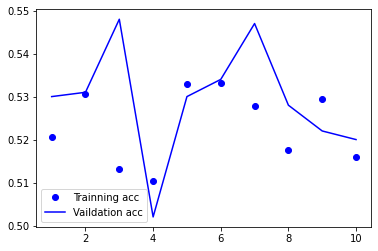

In [7]:
acc = history.history['accuracy']  # 获取训练集准确性数据
val_acc = history.history['val_accuracy']  # 获取验证集准确性数据
loss = history.history['loss']  # 获取训练集错误值数据
val_loss = history.history['val_loss']  # 获取验证集错误值数据
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Trainning acc')  # 以epochs为横坐标，以训练集准确性为纵坐标
plt.plot(epochs, val_acc, 'b', label='Vaildation acc')  # 以epochs为横坐标，以验证集准确性为纵坐标
plt.legend()  # 绘制图例，即标明图中的线段代表何种含义
 
plt.show()